In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df_soln = pd.read_csv("solution.csv")
df_soln.head()

,Studid,Placement
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [4]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Name,10th %age,12th %age,College %age,Amcat,Placement
0,MOHITE AARTI RAMESH,92.0,82.0,9.50,87.0,1
1,WALUNJKAR SIDDHI SHAHURAO,NaN,NaN,NaN,NaN,1
2,KABADI KAIVALYA SUDHIR,92.0,86.0,9.00,51.0,1
3,MULLA MOIN ADILSHAH,91.0,84.0,9.80,64.0,1
4,BHAPKAR SHRUTI MOHANRAO,84.5,NaN,9.41,0.0,1


In [5]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Studid,Name,10th %age,12th %age,College %age,Amcat
0,1,BHALERAO KAJAL SHANKAR,72.4,NaN,88.0,7.0
1,2,BHATEWARA JINESH JAYANT,NaN,NaN,NaN,NaN
2,3,KANSAGARA JEET ASHWIN,NaN,NaN,NaN,NaN
3,4,DESHPANDE ISHAN SHIRISH,NaN,NaN,NaN,NaN
4,5,BHANUSHALI HARSHIT DHIRAJ,90.0,82.46,9.4,94.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          253 non-null    object 
 1   10th %age     135 non-null    float64
 2   12th %age     113 non-null    float64
 3   College %age  135 non-null    float64
 4   Amcat         135 non-null    float64
 5   Placement     253 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 12.0+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Studid        73 non-null     int64  
 1   Name          73 non-null     object 
 2   10th %age     44 non-null     float64
 3   12th %age     39 non-null     float64
 4   College %age  44 non-null     float64
 5   Amcat         44 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [8]:
df_train.shape

(253, 6)

In [9]:
df_test.shape

(73, 6)

In [10]:
df_train.describe()

,10th %age,12th %age,College %age,Amcat,Placement
count,135.000000,113.000000,135.0000,135.000000,253.000000
mean,89.727926,79.640619,13.7800,43.251852,0.770751
std,6.189111,10.600583,18.8244,32.960564,0.421183
min,68.000000,8.000000,7.8000,-2.000000,0.000000
25%,87.000000,75.000000,8.8250,12.000000,1.000000
50%,91.300000,82.000000,9.1100,39.000000,1.000000
75%,94.000000,86.000000,9.5000,73.500000,1.000000
max,100.000000,93.100000,89.6000,100.000000,1.000000


In [11]:
df_test.describe()

,Studid,10th %age,12th %age,College %age,Amcat
count,73.000000,44.000000,39.000000,44.000000,44.000000
mean,37.000000,90.951136,79.101538,14.643409,44.931818
std,21.217131,5.043533,13.687290,20.306082,33.079466
min,1.000000,72.400000,8.000000,8.000000,-2.000000
25%,19.000000,89.975000,75.000000,8.975000,7.000000
50%,37.000000,92.200000,79.540000,9.400000,48.500000
75%,55.000000,94.075000,87.075000,9.612500,76.250000
max,73.000000,99.200000,93.080000,89.500000,98.000000


In [12]:
mask0 = df_train['College %age'] > 10
mask1 = df_test['College %age'] > 10

df_train.loc[mask0, 'College %age'] /= 10
df_test.loc[mask1, 'College %age'] /= 10

In [13]:
df_train.describe()

,10th %age,12th %age,College %age,Amcat,Placement
count,135.000000,113.000000,135.000000,135.000000,253.000000
mean,89.727926,79.640619,9.061733,43.251852,0.770751
std,6.189111,10.600583,0.482183,32.960564,0.421183
min,68.000000,8.000000,7.800000,-2.000000,0.000000
25%,87.000000,75.000000,8.800000,12.000000,1.000000
50%,91.300000,82.000000,9.000000,39.000000,1.000000
75%,94.000000,86.000000,9.470000,73.500000,1.000000
max,100.000000,93.100000,10.000000,100.000000,1.000000


In [14]:
df_test.describe()

,Studid,10th %age,12th %age,College %age,Amcat
count,73.000000,44.000000,39.000000,44.000000,44.000000
mean,37.000000,90.951136,79.101538,9.192273,44.931818
std,21.217131,5.043533,13.687290,0.457002,33.079466
min,1.000000,72.400000,8.000000,8.000000,-2.000000
25%,19.000000,89.975000,75.000000,8.900000,7.000000
50%,37.000000,92.200000,79.540000,9.165000,48.500000
75%,55.000000,94.075000,87.075000,9.592500,76.250000
max,73.000000,99.200000,93.080000,10.000000,98.000000


In [14]:
columns_to_fill = ['10th %age', '12th %age', 'College %age', 'Amcat'] 

# df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].mode().iloc[0])
# df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].mode().iloc[0])

df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].median())
df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].median())

# df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].mean())
# df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].mean())

In [16]:
df_train.head()

,Name,10th %age,12th %age,College %age,Amcat,Placement
0,MOHITE AARTI RAMESH,92.0,82.0,9.50,87.0,1
1,WALUNJKAR SIDDHI SHAHURAO,91.3,82.0,9.00,39.0,1
2,KABADI KAIVALYA SUDHIR,92.0,86.0,9.00,51.0,1
3,MULLA MOIN ADILSHAH,91.0,84.0,9.80,64.0,1
4,BHAPKAR SHRUTI MOHANRAO,84.5,82.0,9.41,0.0,1


In [17]:
df_test.head()

,Studid,Name,10th %age,12th %age,College %age,Amcat
0,1,BHALERAO KAJAL SHANKAR,72.4,79.54,8.800,7.0
1,2,BHATEWARA JINESH JAYANT,92.2,79.54,9.165,48.5
2,3,KANSAGARA JEET ASHWIN,92.2,79.54,9.165,48.5
3,4,DESHPANDE ISHAN SHIRISH,92.2,79.54,9.165,48.5
4,5,BHANUSHALI HARSHIT DHIRAJ,90.0,82.46,9.400,94.0


[Text(0.5, 0, '10th %age'),
 Text(1.5, 0, '12th %age'),
 Text(2.5, 0, 'College %age'),
 Text(3.5, 0, 'Amcat'),
 Text(4.5, 0, 'Placement')]

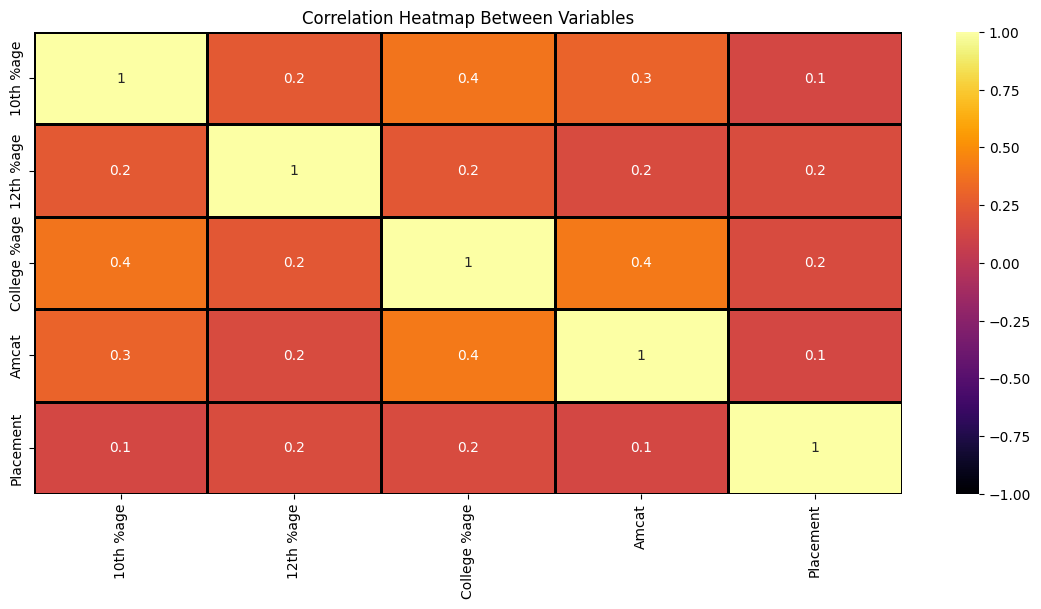

In [18]:
import seaborn as sns
corr_df = df_train.drop(['Name'], axis=1).corr(method="pearson")

plt.figure(figsize=(14,6))
# cannot write each value of dataset in cell
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [19]:
# X contains the features, y contains the target variable

X_train = df_train[['College %age', 'Amcat']]
y_train = df_train['Placement']

X_test = df_test[['College %age', 'Amcat']]
y_test = df_soln['Placement']

In [20]:
# Split the training data into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(
    # X, y, test_size=0.2
# )

In [21]:
# X_test

Logistic Regression

In [22]:
# Initialize the Logistic Regression model

logistic_model = LogisticRegression()

In [23]:
# Train the model on the training set

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Make predictions on the testing set
# logistic_model.score(X_test, y_test)

y_pred1 = logistic_model.predict(X_test)
np.array(y_pred1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
# Evaluate the model

accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy of Logistic Regression: {accuracy1:.2f}')

Accuracy of Logistic Regression: 0.84


In [27]:
confusion_matrix(y_test, y_pred1)

array([[ 0, 12],
       [ 0, 61]], dtype=int64)

             Actual Positive   Actual Negative
Predicted Positive          60                21
Predicted Negative         0 1               0 1


Support Vector machine SVM

In [28]:
df_train0 = df_train[df_train.Placement == 0]
df_train1 = df_train[df_train.Placement == 1]
# df_train0.head()
# df_train1.head()

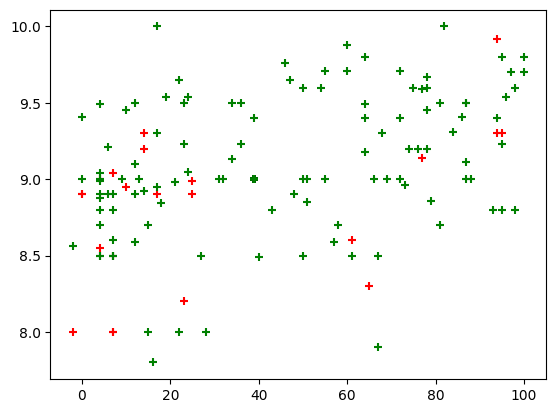

In [29]:
plt.scatter(df_train0['Amcat'], df_train0['College %age'], color='red', marker='+')
plt.scatter(df_train1['Amcat'], df_train1['College %age'], color='green', marker='+')

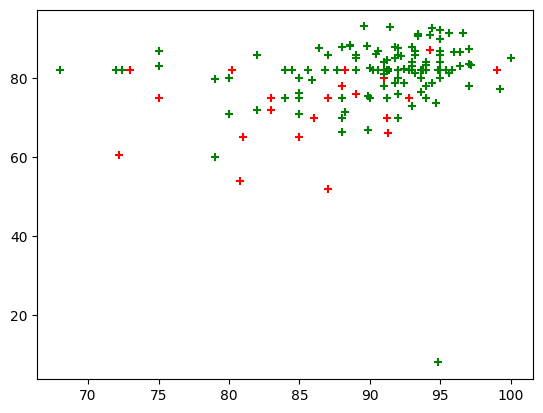

In [30]:
plt.scatter(df_train0['10th %age'], df_train0['12th %age'], color='red', marker='+')
plt.scatter(df_train1['10th %age'], df_train1['12th %age'], color='green', marker='+')

In [31]:
from sklearn.svm import SVC
svc_model = SVC()

In [32]:
svc_model.fit(X_train, y_train)

SVC()

In [33]:
svc_model.score(X_test, y_test)

0.8356164383561644

In [34]:
y_pred2 = svc_model.predict(X_test)
np.array(y_pred2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy of SVM: {accuracy2:.2f}')

Accuracy of SVM: 0.84


In [37]:
confusion_matrix(y_test, y_pred2)

array([[ 0, 12],
       [ 0, 61]], dtype=int64)

Decission Tree

In [38]:
from sklearn import tree
decission_model = tree.DecisionTreeClassifier()

In [39]:
decission_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
decission_model.score(X_test,y_test)

0.8904109589041096

In [41]:
y_pred3 = decission_model.predict(X_test)
np.array(y_pred3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [42]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy of Decission tree: {accuracy3:.2f}')

Accuracy of Decission tree: 0.89


In [44]:
confusion_matrix(y_test, y_pred3)

array([[ 5,  7],
       [ 1, 60]], dtype=int64)

Random Forest Algorithm

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [46]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
rf_model.score(X_test, y_test)

0.9041095890410958

In [48]:
y_pred4 = rf_model.predict(X_test)
np.array(y_pred4)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [49]:
d = {"Studid": df_soln['Studid'], "Placement": y_pred4}
Submission = pd.DataFrame(d)

In [50]:
Submission.to_csv('Submission.csv')

In [51]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
accuracy4 = accuracy_score(y_test, y_pred4)
print(f'Accuracy of Random Forest: {accuracy4:.2f}')

Accuracy of Random Forest: 0.90


In [53]:
confusion_matrix(y_test, y_pred4)

array([[ 5,  7],
       [ 0, 61]], dtype=int64)

KNN algorithm

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn.score(X_test, y_test)

0.8493150684931506

In [57]:
y_pred5 = knn.predict(X_test)
np.array(y_pred5)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
np.array(df_soln['Placement'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
accuracy5 = accuracy_score(y_test, y_pred5)
print(f'Accuracy of Random Forest: {accuracy5:.2f}')

Accuracy of Random Forest: 0.85


In [60]:
confusion_matrix(y_test, y_pred5)

array([[ 2, 10],
       [ 1, 60]], dtype=int64)

In [61]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()

In [62]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [63]:
NB_model.score(X_test, y_test)

0.8356164383561644

In [64]:
y_pred6 = NB_model.predict(X_test)
np.array(y_pred6)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [65]:
from xgboost import XGBClassifier

In [66]:
# Set hyperparameters
params = {
    'objective': 'binary:logistic',  # for binary classification problems
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'  # use logloss for binary classification
}

# Create XGBClassifier
xg_model = XGBClassifier(**params, n_estimators=100)

# Train the model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [67]:
# Make predictions
y_pred = xg_model.predict(X_test)
np.array(y_pred)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [69]:
xg_model.score(X_test, y_test)

0.863013698630137